## Simple Neural Network

- Initialization: The code initializes weights randomly, sets up the input and output datasets, and defines the sigmoid activation function and its derivative.

- Forward Propagation: The input data (a0) is passed through the first layer (with weights w0) using matrix multiplication and the sigmoid activation function. This gives the output of the first layer (a1). The same process is repeated for the second layer (with weights w1) to get the final output (a2).

- Error Calculation: The difference between the predicted output (a2) and the actual output (y) is calculated as the error.

- Back Propagation: The error is propagated back through the network to adjust the weights. The deltas (layer2_delta and layer1_delta) are calculated using the error and the derivative of the sigmoid function.

- Weight Update: The weights (w1 and w0) are updated using the deltas and the outputs of the previous layers. This process is repeated for a specified number of iterations (epochs) to minimize the error.


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Define the sigmoid activation function and its derivative function, to use later.
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)

In [3]:
# Sample Input dataset
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# Sample Output dataset
y = np.array([[0],
              [1],
              [1],
              [0]])

### Prepare Network and Perform Training

Network Structure:
- 3 Input features.
- Layer 1 has 4 Nodes.
- Layer 2 (Output Layer) has 1 Node.


In [4]:
np.random.seed(1)

# Initializing weights randomly, but keeping mean of weights as zero.
w0 = 2 * np.random.random((3,4)) - 1
w1 = 2 * np.random.random((4,1)) - 1

In [5]:
# To collect errors for plotting later
errors = []


# Iterate over 5000 epochs/times (epoch is the mainstream/official term for 1 iteration of forward+backprop)
for i in range(5000):

  # Forward propagation
  #############################################
  # Hint: Use numpy dot operation and above implemented sigmoid
  #

  a0 = X
  a1 = sigmoid(np.dot(a0,w0))
  a2 = sigmoid(np.dot(a1,w1))

  #
  #############################################

  # Calculate the error in model output(layer2)
  #############################################
  #

  output_error = a2 - y

  #
  #############################################


  # Storing the error for every epoch
  errors.append({
    "epochs": i,
    "error": np.mean(np.abs(output_error))
  })
  # Printing the error every 500 steps
  if (i % 500) == 0:
    print("Error after "+str(i)+" epochs:" + str(np.mean(np.abs(output_error))))
  # Back propagate the error
  layer2_delta = output_error * sigmoid_derivative(a2)
  layer1_error = layer2_delta.dot(w1.T)
  layer1_delta = layer1_error * sigmoid_derivative(a1)


  # Update weights using the layer delta
  #############################################
  # Hint: a^T * layer_delta
  #

  w1 -= a1.T.dot(layer2_delta)
  w0 -= a0.T.dot(layer1_delta)

  #
  #############################################

Error after 0 epochs:0.4964100319027255
Error after 500 epochs:0.099292092737883
Error after 1000 epochs:0.042984647810726195
Error after 1500 epochs:0.030122764096817193
Error after 2000 epochs:0.024121949891468507
Error after 2500 epochs:0.020542517228580394
Error after 3000 epochs:0.018121400645678867
Error after 3500 epochs:0.01635335860503167
Error after 4000 epochs:0.014993830283221644
Error after 4500 epochs:0.013908868267333547


<Axes: title={'center': 'Error in the network while training the model'}, xlabel='epochs'>

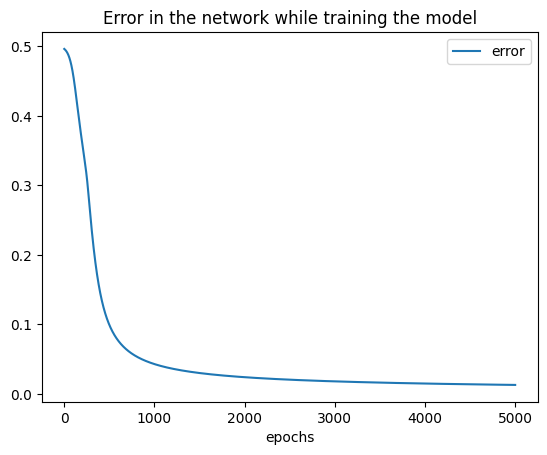

In [6]:
pd.DataFrame(errors).plot(x='epochs', y='error', title = 'Error in the network while training the model')